<a href="https://colab.research.google.com/github/ShreyaBiltheria/pract/blob/main/2A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5404 - loss: 0.6923 - val_accuracy: 0.6456 - val_loss: 0.6860
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6619 - loss: 0.6808 - val_accuracy: 0.6718 - val_loss: 0.6661
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6928 - loss: 0.6535 - val_accuracy: 0.6874 - val_loss: 0.6352
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7237 - loss: 0.6124 - val_accuracy: 0.6954 - val_loss: 0.6028
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7424 - loss: 0.5675 - val_accuracy: 0.7030 - val_loss: 0.5772


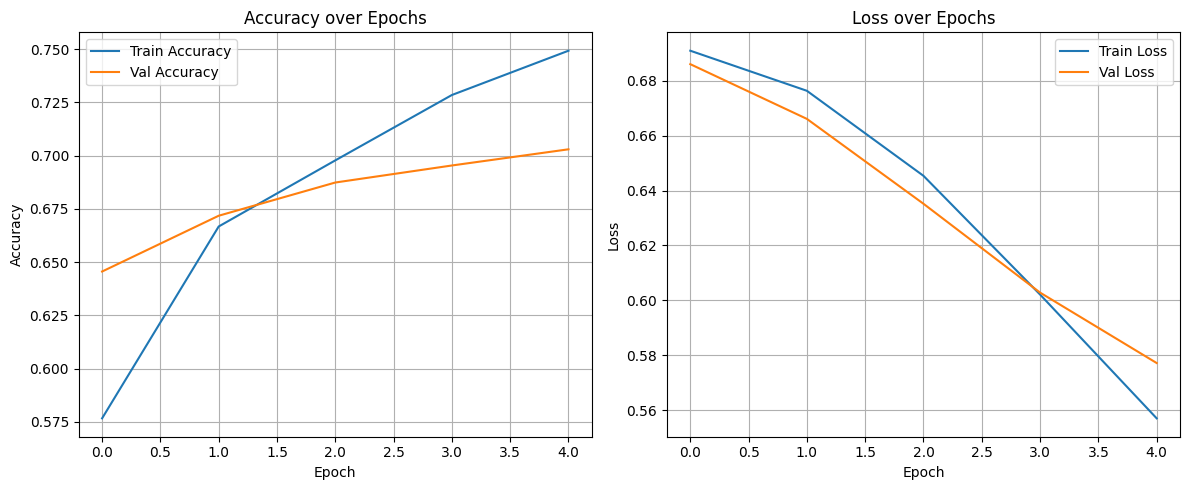

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Review 1
Predicted Sentiment: Negative
Actual Sentiment   : Negative
--------------------------------------------------
Review 2
Predicted Sentiment: Positive
Actual Sentiment   : Positive
--------------------------------------------------
Review 3
Predicted Sentiment: Positive
Actual Sentiment   : Positive
--------------------------------------------------
Review 4
Predicted Sentiment: Positive
Actual Sentiment   : Negative
--------------------------------------------------
Review 5
Predicted Sentiment: Negative
Actual Sentiment   : Positive
--------------------------------------------------
Review 6
Predicted Sentiment: Negative
Actual Sentiment   : Positive
--------------------------------------------------
Review 7
Predicted Sentiment: Negative
Actual Sentiment   : Positive
--------------------------------------------------
Review 8
Predicted Sentiment: Positive
Actual Sentiment   : Negative
--------------------------------------------------
Re

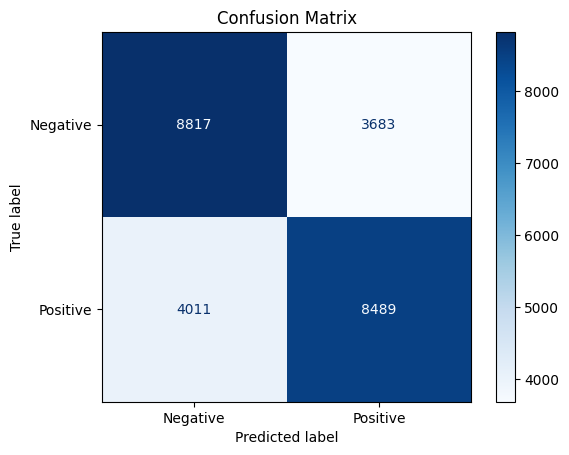

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Review 1 (decoded):
[START] please give this one a miss br br [UNK] [UNK] and the rest of the cast rendered terrible performances
Actual Sentiment   : Negative
Predicted Sentiment: Negative
--------------------------------------------------------------------------------

Review 2 (decoded):
[START] this film requires a lot of patience because it focuses on mood and character development the plot is very
Actual Sentiment   : Positive
Predicted Sentiment: Positive
--------------------------------------------------------------------------------

Review 3 (decoded):
[START] many animation buffs consider [UNK] [UNK] the great forgotten genius of one special branch of the art puppet animation
Actual Sentiment   : Positive
Predicted Sentiment: Positive
--------------------------------------------------------------------------------

Review 4 (decoded):
[START] i generally love this type of movie however this time i found myself wanting to kick

In [ ]:
# Install TensorFlow (for Jupyter only)
#try:
  #  import tensorflow as tf
#except ImportError:
    #!pip install tensorflow
    #import tensorflow as tf
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

# Set random seed
np.random.seed(42)
tf.random.set_seed(42)

# Load IMDB data with only top 10,000 most frequent words
vocab_size = 10000
max_length = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure equal length
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

# Build model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=16, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=5, batch_size=512, validation_split=0.2, verbose=1)

# -------- VISUALIZATION: Accuracy and Loss ----------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# -------- EVALUATION: Predict First 10 Samples ----------
predictions = model.predict(x_test[:10])

for i in range(10):
    print(f"Review {i+1}")
    print(f"Predicted Sentiment: {'Positive' if predictions[i] > 0.5 else 'Negative'}")
    print(f"Actual Sentiment   : {'Positive' if y_test[i] == 1 else 'Negative'}")
    print("-" * 50)

# -------- CLASSIFICATION REPORT ----------
y_pred = (model.predict(x_test) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# -------- CONFUSION MATRIX ----------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# -------- DECODE REVIEWS ----------
# Load word index dictionary
word_index = imdb.get_word_index()

# Shift indices + add special tokens
reverse_word_index = {value + 3: key for key, value in word_index.items()}
reverse_word_index[0] = '[PAD]'
reverse_word_index[1] = '[START]'
reverse_word_index[2] = '[UNK]'

# Function to decode
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i, '?') for i in encoded_review])

# Show decoded review + prediction
for i in range(5):
    print(f"\nReview {i+1} (decoded):")
    print(decode_review(x_test[i]))
    print(f"Actual Sentiment   : {'Positive' if y_test[i] == 1 else 'Negative'}")
    print(f"Predicted Sentiment: {'Positive' if predictions[i] > 0.5 else 'Negative'}")
    print('-' * 80)
